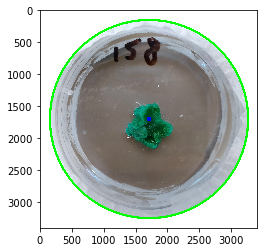

In [10]:
# READ

import plantcv 
from photo_pipeline import calculation as ccl
import os
from scipy.spatial import distance as dist
from imutils import perspective, contours
import numpy as np
import argparse
import imutils
import cv2
import fire
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from skimage.color import rgb2gray, gray2rgb

%matplotlib inline

image = cv2.imread("test/cropped_IMG_20200326_174326.jpg") 
plt.imshow(image);

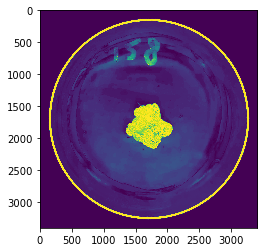

In [11]:
from plantcv import plantcv as pcv
s = pcv.rgb2gray_hsv(rgb_img=image, channel = 's')
plt.imshow(rgb2gray(s))

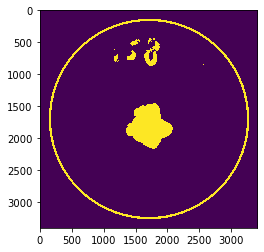

In [12]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
plt.imshow(s_thresh)

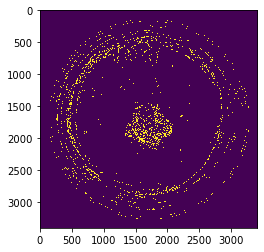

In [38]:
from dask_image import ndfilters
from skimage.filters import sobel, gaussian
from skimage.feature import canny

from scipy import ndimage as ndi
from skimage.morphology import binary_opening

edges = canny(rgb2gray(image), sigma = .00001)
#edges = sobel(rgb2gray(image))

#fill = ndi.binary_fill_holes(edges)

#smoothed = gaussian(image)
#absolute_threshold = smoothed > 0

#image[absolute_threshold] = 255

#fill = binary_opening(edges)

plt.imshow(edges)

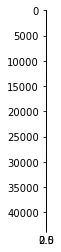

In [39]:
from skimage.feature import blob_dog, blob_log, blob_doh

blobs_log = blob_log(rgb2gray(image), max_sigma=30, num_sigma=10, threshold=.1)

plt.imshow(blobs_log)

In [91]:
# LOGIC

# class Options(param.Parameterized): 
    
#     l1 = param.Number(default = 0, bounds = (0, 255), allow_None = False, step = 1, doc = 'L1')
#     l2 = param.Number(default = 100, bounds = (0, 255), allow_None = False, step = 1, doc = 'L2')
#     l3 = param.Number(default = 0, bounds = (0, 255), allow_None = False, step = 1, doc = 'L3')
                      
#     u1 = param.Number(default = 144, bounds = (0, 255), allow_None = False, step = 1, doc = 'U1')
#     u2 = param.Number(default = 238, bounds = (0, 255), allow_None = False, step = 1, doc = 'U2')
#     u3 = param.Number(default = 144, bounds = (0, 255), allow_None = False, step = 1, doc = 'U3')
    
# print("Select your options and click the button to run the widget.\nChange l2 to 50 for better results.")
# paramnb.Widgets(Options, next_n = 2, continuous_update = True, button = True)